# Introduction into regression analysis

In pattern recognition problem we have

$Y \in D_Y = \{w_1, ... , w_k\}$

is a set of unordered values, i.e. $Y$ - a qualitative variable

**Regression analysis**: $Y \in R$ is a real-valued variable.

Random samples of objects $ \{ o^{(1)}, ... , o^{(N)}\}$

Set of variables $X_1, ... , X_n$

Data table $ x^{(i)}_j = X_j(o^{(i)}),\space j = 1, ... , n; y^{(i)}=Y(o^{(i)}) \space i = 1, ... , N $

Purpose of analysis is to predict values of variable $Y$ depending on values $X$ for any new object by minimizing some expected loss $L(y_{pred}, y_{real})$

Usually we use OLS (ordinary least squares) loss function : $L(y_{pred}, y_{real}) = (y_{pred} - y_{real})^2$

## Approaches for regression:
* Parametric models
* Non-parametric
* SVM
* Logical rules (regression trees)
* ...


Our linear model will look like:
$$ Y^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + ... + \beta_nx^{(i)}_n + \epsilon^{(i)} $$

$ \epsilon $ - is supposed to be $N(0, \sigma)$, $\epsilon^{(i)}$ and $\epsilon^{(i)}$ are supposed to be independent for $i \neq j $

in matrix form:
**$$ Y = X\beta +  \epsilon $$**

# Examples of regression implementations (OLS)

* scikit-learn - easier to use
* statsmodel - provide stats out of the box (easier to perform statistical tests, and build confidence intervals), but interfaces are a bit harder
* tensorflow - we build linear regression with that library just to grasp a concept of computational graphs and SGD optimization


('Coefficients: \n', array([ 938.23786125]), 152.91886182616167)
Mean squared error: 2548.07
Variance score: 0.47


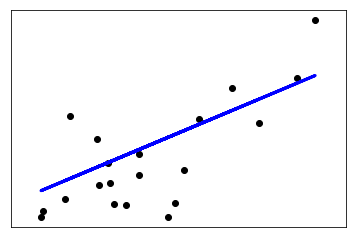

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
%matplotlib inline

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_, regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [2]:
import numpy as np
import statsmodels.api as sm

spector_data = sm.datasets.spector.load()
X = sm.add_constant(spector_data.exog, prepend=False)
Y = spector_data.endog


# Fit and summarize OLS model
mod = sm.OLS(exog=X, endog=Y)
res = mod.fit()

print(res.summary())

print('RMSE', np.mean((res.predict(X) - Y)**2))
spector_data

C:\Users\mariy\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Thu, 01 Jun 2017   Prob (F-statistic):            0.00157
Time:                        19:56:22   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

<class 'statsmodels.datasets.utils.Dataset'>

In [4]:
!conda install conda-forge tensorflow

Fetching package metadata .............



PackageNotFoundError: Package missing in current win-64 channels: 
  - conda-forge

Close matches found; did you mean one of these?

    conda-forge: conda-env



In [3]:
%%capture
!pip install tensorflow

# Tensorflow linear regression 
You can install it with:
```sh
pip install tensorflow
```
Our model will be small, so it should work fine with CPU.

Tensorflow tl;dr 

First you need to create computational graph with those functions

[tf.placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) - reserve place for input

[tf.Variable](https://www.tensorflow.org/api_docs/python/tf/Variable) - parameters that you will optimize

tf.add, tf.multiply ... - operations (node of the computational graph) [Read the docs](https://www.tensorflow.org/api_docs/python/tf)

Define:
1. Cost function - it is also the same computational node (`cost` in example bellow)
2. create Optimizer 

When you have finished to creat your computational graph, you need to create Session -> Initialize variables -> Run optimizer/


Epoch: 0050 cost= 0.365199298 W= 0.549635 b= -1.35701
Epoch: 0100 cost= 0.331911296 W= 0.53179 b= -1.22863
Epoch: 0150 cost= 0.302467197 W= 0.515006 b= -1.10789
Epoch: 0200 cost= 0.276422262 W= 0.499221 b= -0.994334
Epoch: 0250 cost= 0.253384501 W= 0.484374 b= -0.887529
Epoch: 0300 cost= 0.233006924 W= 0.470411 b= -0.787077
Epoch: 0350 cost= 0.214982405 W= 0.457278 b= -0.692599
Epoch: 0400 cost= 0.199039042 W= 0.444926 b= -0.603739
Epoch: 0450 cost= 0.184936985 W= 0.433309 b= -0.520166
Epoch: 0500 cost= 0.172463357 W= 0.422382 b= -0.441562
Epoch: 0550 cost= 0.161430135 W= 0.412105 b= -0.367633
Epoch: 0600 cost= 0.151671186 W= 0.40244 b= -0.2981
Epoch: 0650 cost= 0.143039390 W= 0.39335 b= -0.232704
Epoch: 0700 cost= 0.135404557 W= 0.3848 b= -0.171197
Epoch: 0750 cost= 0.128651634 W= 0.376758 b= -0.113348
Epoch: 0800 cost= 0.122678697 W= 0.369195 b= -0.0589397
Epoch: 0850 cost= 0.117395781 W= 0.362082 b= -0.00776721
Epoch: 0900 cost= 0.112723157 W= 0.355392 b= 0.0403617
Epoch: 0950 cost=

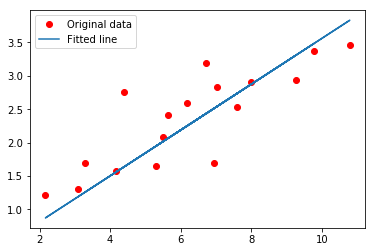

Testing... (Mean square loss Comparison)
Testing cost= 0.0916676
Absolute mean square loss difference: 0.0132675


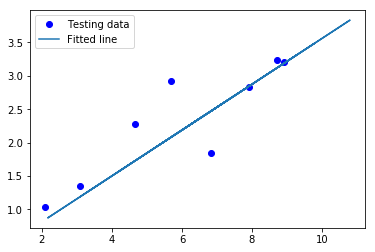

In [4]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

# Task:
1. download dataset from https://www.kaggle.com/harlfoxem/housesalesprediction, make train, test datasets
2. build linear regression  using `sqft_living` or `sqft_lot` of house age features 
3. build these regression models using different libraries (sklearn, statsmodel, tensorflow)
4. compare models using $R^2$, $R^2_{adj}$ and RMSE 

# ................................................................................................................................

### download dataset from https://www.kaggle.com/harlfoxem/housesalesprediction, make train, test datasets 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
%matplotlib inline

import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation  import train_test_split 

data = pd.read_csv("kc_house_data.csv")

data_train, data_test, target_train, target_test = train_test_split(data.sqft_living, data.price, random_state = 100, test_size = 0.3)

### build linear regression using sqft_living or sqft_lot of house age features

In [8]:
data_train = np.array(data_train)
data_test = np.array(data_test)
target_train = np.array(target_train)
target_test = np.array(target_test)
data_train_sk = data_train.reshape(data_train.shape[0],1)
data_test_sk = data_test.reshape(data_test.shape[0],1)
target_train_sk = target_train.reshape(target_train.shape[0],1)
target_test_sk = target_test.reshape(target_test.shape[0],1)

### build these regression models using different libraries (sklearn, statsmodel, tensorflow)

sklearn

Coefficients: 
 [[ 279.73039149]] [-40514.31944706]
Squared error: 67101265833.11
Variance score: 0.51


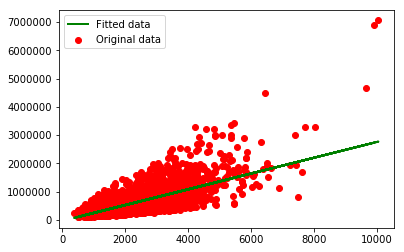

In [15]:
skilearn_regr = linear_model.LinearRegression()
skilearn_regr.fit(data_train_sk, target_train_sk)

print('Coefficients: \n', skilearn_regr.coef_, skilearn_regr.intercept_)

print("Squared error: %.2f"
      % np.mean((skilearn_regr.predict(data_test_sk) - target_test_sk) ** 2))

print('Variance score: %.2f' % skilearn_regr.score(data_test_sk, target_test_sk))

plt.scatter(data_test_sk, target_test_sk,  color='red',label='Original data')
plt.plot(data_test_sk, skilearn_regr.predict(data_test_sk), color='green', linewidth=2, label='Fitted data')

plt.legend()
plt.show()

ski_rsq = skilearn_regr.score(data_test_sk,target_test_sk)
ski_rsq_adj = ski_rsq - (1 - ski_rsq)/(len(target_test_sk)-2)
ski_rmse = np.sqrt(np.mean((skilearn_regr.predict(data_test_sk) - target_test_sk) ** 2))

statsmodel

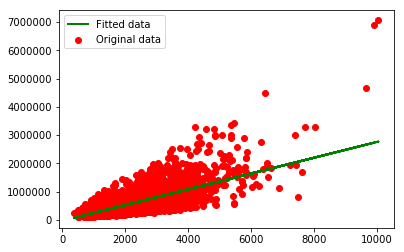

In [14]:
X_train = sm.add_constant(data_train, prepend=False)
Y_train = target_train
X_test = sm.add_constant(data_test, prepend=False)
Y_test = target_test

mod = sm.OLS(Y_train, X_train)
res = mod.fit()

plt.scatter(data_test, Y_test,  color='red',label='Original data')
plt.plot(data_test, res.predict(X_test), color='green', linewidth=2, label='Fitted data')
plt.legend()
plt.show()

mod_help = sm.OLS(Y_train, X_train)
res_help = mod_help.fit()

st_rsq = res_help.rsquared
st_rsq_adj = res_help.rsquared_adj
st_rmse = np.sqrt(np.mean((res.predict(X_test)- Y_test) ** 2))

Epoch: 0005 cost= 35632312320.000000000 W= 243.161 b= -1.1889
Epoch: 0010 cost= 34585776128.000000000 W= 261.713 b= -1.18471
Epoch: 0015 cost= 34578669568.000000000 W= 263.129 b= -1.18742
Epoch: 0020 cost= 34578563072.000000000 W= 263.235 b= -1.19065
Epoch: 0025 cost= 34578558976.000000000 W= 263.243 b= -1.19392
Epoch: 0030 cost= 34578579456.000000000 W= 263.244 b= -1.19719
Epoch: 0035 cost= 34578579456.000000000 W= 263.244 b= -1.20045
Epoch: 0040 cost= 34578579456.000000000 W= 263.244 b= -1.20372
Epoch: 0045 cost= 34578579456.000000000 W= 263.244 b= -1.20699
Epoch: 0050 cost= 34578579456.000000000 W= 263.244 b= -1.21026
/n
Training cost= 3.45786e+10 W= 263.244 b= -1.21026 



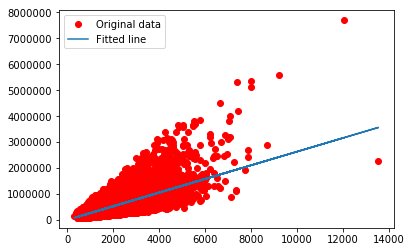

Testing... (Mean square loss Comparison)
Testing cost= 3.37522e+10
Absolute mean square loss difference: 8.26413e+08


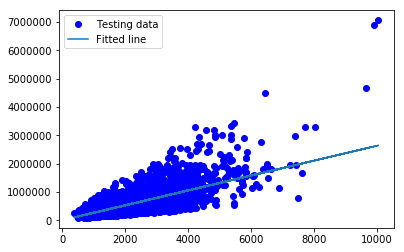

In [11]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

learning_rate = 1e-7
training_epochs = 50
display_step = 5

train_X = numpy.asarray(data_train)
train_Y = numpy.asarray(target_train)
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("/n")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray(data_test)
    test_Y = numpy.asarray(target_test)

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))
    
    target_pred = sess.run(W) * test_X + sess.run(b)
    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(test_X, sess.run(W) * test_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    
    ten_rsq = np.sum((target_pred- np.mean(test_Y)) ** 2) / np.sum((test_Y - np.mean(test_Y))**2)
    ten_rsq_adj = ten_rsq - (1 - ten_rsq)/(len(test_Y)-2)
    ten_rmse = np.sqrt(np.mean((target_pred- test_Y) ** 2))

### compare models using $R^2$, $R^2_{adj}$ and RMSE 

In [16]:
compare = {r'$R^2$' : pd.Series([ski_rsq,st_rsq,ten_rsq], index=['sklearn','statsmodel','tensorflow']),
             r'$R^2_{adj}$' : pd.Series([ski_rsq_adj,st_rsq_adj,ten_rsq_adj], index=['sklearn','statsmodel','tensorflow']),
          'RMSE' : pd.Series([ski_rmse,st_rmse,ten_rmse], index=['sklearn','statsmodel','tensorflow'])}
 
compare_table = pd.DataFrame(compare)
compare_table

,$R^2$,$R^2_{adj}$,RMSE
sklearn,0.505164,0.505088,259039.120276
statsmodel,0.487507,0.487473,259039.120276
tensorflow,0.438937,0.438851,259815.978249


We can see that models from sklearn and statsmodel gave us very close results but tensorflow have slightly worse values of estimates. The reason of this phenomena consists in bed choise of the parameters (number of epoch and learning rate). Another reason is low speed of the method.

# Categorical variables

Task:
1. Answer the questions:
    - What is a categorical variables?
    - Which features from the house sales dataset are categical?
    - How can you make model using these features?

## Answers

### What is a categorical variables?

variables with limited number of values (for example, rainbow's colors or gender). these variables can be only equal or not, we can't say which one bigger or smaller, 

### Which features from the house sales dataset are categical?

these are waterfront, view

### How can you make model using these features?

If one of the variables is categorical (for example, sex: 'male', 'female') and we want to make regression with help of them we can transform nominal value to the ordered ('male' = 1, 'female' = 0)

## Regularization

Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero. It tends to reduce variance more than it increases bias, and thus minimizes overfitting.

Common regularization techniques for linear models:

- **Ridge regression** (also known as "L2 regularization"): shrinks coefficients toward zero (but they never reach zero)
- **Lasso regularization** (also known as "L1 regularization"): shrinks coefficients all the way to zero
- **ElasticNet regularization**: balance between Ridge and Lasso

Lasso regularization is useful if we believe many features are irrelevant, since a feature with a zero coefficient is essentially removed from the model. Thus, it is a useful technique for feature selection.

How does regularization work?

- A tuning parameter alpha (or sometimes lambda) imposes a penalty on the size of coefficients.
- Instead of minimizing the "loss function" (mean squared error), it minimizes the "loss plus penalty".
- A tiny alpha imposes no penalty on the coefficient size, and is equivalent to a normal linear model.
- Increasing the alpha penalizes the coefficients and shrinks them toward zero.


![reg_picture](https://qph.ec.quoracdn.net/main-qimg-2a88e2acc009fa4de3edeb51e683ca02)


Task:
1. Build crosscorrelation table for features
2. Fit linear regression model using at least 2 highly correlated features
3. Plot values of regrssion coefficients as a function of regularization parameter $\alpha$ for LASSO and RIDGE models. [example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py)

## Solution

### Build crosscorrelation table for features

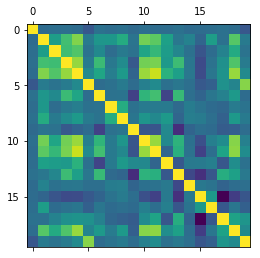

In [17]:
plt.matshow(data.corr())

As we can see from the plot the most correlated features are 5th (sqft_living) and 12th(sqft_above). Coefficient of correlation is equal to 0.876597.

### Fit linear regression model using at least 2 highly correlated features

In [18]:
import sklearn.preprocessing as prep
from sklearn.linear_model import Ridge, Lasso
data_reg = data[['sqft_living','sqft_above']]

X = prep.scale(data_reg)
y = prep.scale(data.price)

n_alphas = 200
alphas = np.logspace(-7, 10, n_alphas)
ridge_reg = linear_model.Ridge(fit_intercept=False)

### Plot values of regrssion coefficients as a function of regularization parameter $\alpha$ for LASSO and RIDGE models.

/Users/anatoly.belonog/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


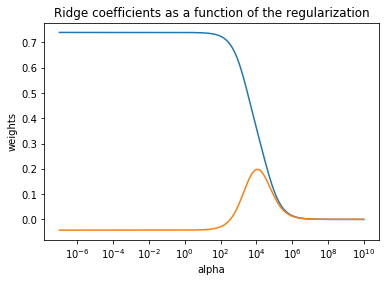

In [19]:
coefs = []
for a in alphas:
    ridge_reg.set_params(alpha=a)
    ridge_reg.fit(X, y)
    coefs.append(ridge_reg.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend()
plt.show()

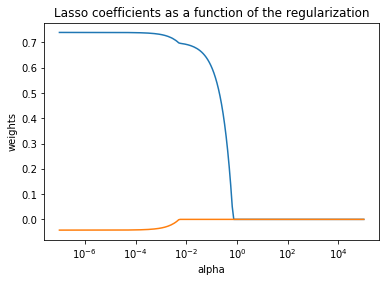

In [19]:
alphas = np.logspace(-7, 5, n_alphas)

lasso_reg = Lasso(fit_intercept=False)

coefs = []
for a in alphas:
    lasso_reg.set_params(alpha=a)
    lasso_reg.fit(X, y)
    coefs.append(lasso_reg.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.legend()
plt.show()

At the pictures we can see the fact when we increase $\alpha$ weights tend to zero value. It happens because great value of $\alpha$ makes regelarising part of cost function greater then "accuracy" part. To obtain more or less good results in this case we need to have zero weights.   

# Regression trees 

Task:
1. try `sklearn.tree.DecisionTreeRegressor`
2. compare models using $R^2$, $R^2_{adj}$ and RMSE 


## Solution

### try `sklearn.tree.DecisionTreeRegressor`

In [73]:
from sklearn.tree import DecisionTreeRegressor

des_regr = DecisionTreeRegressor(random_state=0)
des_regr.fit( data_train_sk, target_train_sk )
target_pred_des = des_regr.predict ( data_test_sk )

### compare models using $R^2$, $R^2_{adj}$ and RMSE

In [74]:
des_rsq = des_regr.score( data_test_sk, target_test_sk )
des_rsq_adj = des_rsq - (1 - des_rsq)/(len(target_test_sk)-2)
des_rmse = np.sqrt(np.mean((des_regr.predict ( data_test_sk ) - target_test) ** 2))

compare = {r'$R^2$' : pd.Series([ski_rsq,st_rsq,ten_rsq, des_rsq], index=['sklearn','statsmodel','tensorflow', 'destree']),
             r'$R^2_{adj}$' : pd.Series([ski_rsq_adj,st_rsq_adj,ten_rsq_adj,des_rsq_adj], index=['sklearn','statsmodel','tensorflow','destree']),
          'RMSE' : pd.Series([ski_rmse,st_rmse,ten_rmse, des_rmse], index=['sklearn','statsmodel','tensorflow', 'destree'])}
 
compare_table = pd.DataFrame(compare)
compare_table

,$R^2$,$R^2_{adj}$,RMSE
sklearn,0.505164,0.505088,259039.120276
statsmodel,0.487507,0.487473,259039.120276
tensorflow,0.438936,0.438849,259816.005114
destree,0.492168,0.492090,262418.635761


Descision tree has values of estimates which are very close to the same estimates of sklearn and statsmodel.

# XGBoost regressor 
I have mentioned it here only for you to know about the existence of that model